# Categories of Machine Learning

**`Supervised learning`**
- Involves somehow modeling the relationship between measured features of data and some label 
associated with the data
- Once this model is determined
- Model can be used to apply labels to new, unknown data. 

**Supervised learning further divided in to `classification` task and `regression` task**
- In classification, the labels are `discrete categories`
- In regression, the labels are `continuous quantities`

## Supervised Learning Example: Iris Classification

- In this example of Iris classification we will be using Gaussian Nauve Bayes
- It is fast and no hyperparameter to choose
- Bayes is often a good model to use as a baseline classification for further umprovements

### Evaluate the model on data it has not seen before

- Split the data into traingin set and testing set
- Using train_test_split function

In [1]:
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# extracting features matrix

X_iris = iris.drop('species', axis = 1)
print(X_iris.shape)
type(X_iris)

(150, 4)


pandas.core.frame.DataFrame

In [4]:
# extracting target array

y_iris = iris['species']
print(y_iris.shape)
type(y_iris)

(150,)


pandas.core.series.Series

In [5]:
# splitting the data into training and test dataset

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)

In [6]:
# Choose the model

from sklearn.naive_bayes import GaussianNB

In [7]:
# Instantiate(實例化) the model

model = GaussianNB()

In [8]:
# fit the model

model.fit(Xtrain, ytrain)

GaussianNB()

In [9]:
# predict on new data

y_model = model.predict(Xtest)

**Use accuracy score to match the predicted labels with their true value**

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [11]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [12]:
print(len(ytest))
print(len(y_model))

38
38


## Unsupervised Learning Exampel:
## Iris dimensionality reduction

- Iris data is having four features means four dimensional data
- The propose is to visualize the data by retaining the essential features of the data
- It is hard to visualize four-dimensional data compare to two-dimensional data

**Using Principal Component Analysis(PCA)**

- A fast linear dimensionality reduction technique
- Asking the model to return two-dimensional data (four-dimension into tow-dimension)

In [13]:
# Choose the model class

from sklearn.decomposition import PCA

In [14]:
# Instantiate the model with hyperparameters

model = PCA(n_components = 2)

In [15]:
# fit the data, notice y is not specified

model.fit(X_iris)

PCA(n_components=2)

In [16]:
# transform the data to two-dimension

X_2d = model.transform(X_iris)

In [17]:
X_2d

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [18]:
iris['PCA1'] = X_2d[:,0] # all rows and number 0 columns
iris['PCA2'] = X_2d[:,1] # all rows and number 1 columns

In [19]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


- Visualizing the two-dimensional data after applying PCA

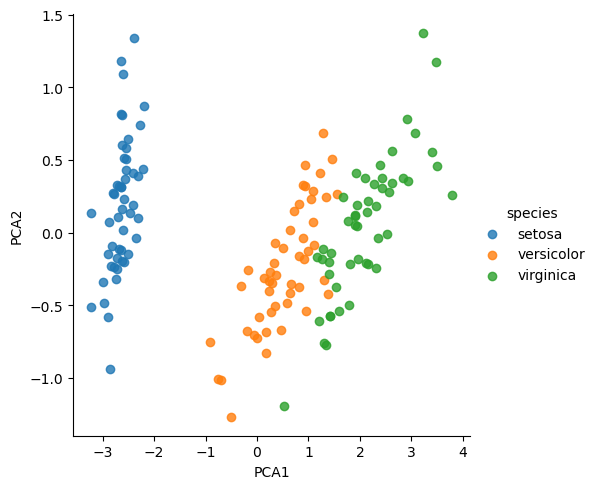

In [20]:
sns.lmplot(data = iris, x = 'PCA1', y = 'PCA2', hue = 'species', fit_reg = False)

# Unsupervised Learning: Iris clustering

- We will apply clustering to the Iris data
- Without any reference to any label, clustering trues to find the groups in data
- Gaussian mixture model is a powerful clustering method

In [21]:
# Choose the model

from sklearn.mixture import GaussianMixture as GMM

In [22]:
# Instantiate the model with hyperparameter
# covariance type controls the degree of freedom in the shape of each cluster
# covariance type = 'full' allows each cluster to be modeled as an ellipse(橢圓)

model = GMM(n_components = 3, covariance_type = 'full')

In [23]:
# fit the data

model.fit(X_iris)
# notice that we have not specified y

GaussianMixture(n_components=3)

In [24]:
# Determine the cluster

y_gmm = model.predict(X_iris)

- We add cluster label to iris DataFrame and use seaborn

In [25]:
iris['cluster'] = y_gmm

In [26]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532,1
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317,1
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859,1
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628,1


In [27]:
iris['cluster'].value_counts()

1    55
0    50
2    45
Name: cluster, dtype: int64

## Visualizing the clusters

In [28]:
sns.lmplot(data = iris, x = 'PCA1', y = 'PCA2', hue = 'species',
          col = 'cluster', fit_reg = False)

# Hyperparameters and Model Validation(驗證)

**The most important question in machine learning is how to select and validate your model**

- 1. Choose the model
- 2. Choose a model hyperparameter
- 3. Fit the model to the training data
- 4. Use the model to predict the labels for new data

## Thinking about Model Validation

- One way to check the effectiveness of our model is to apply training data 
and compare the prediction to the known value

### Model validation the wrong way

- Let's import the data

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()

In [30]:
# extracting features and target values from iris data

X = iris.data
y = iris.target

- Here we will use k-neighbors classifier with n_neighbors = 1
- It says the label of an unknown point is the same as the label of its closest training point

In [31]:
# Choose the model

from sklearn.neighbors import KNeighborsClassifier

In [32]:
# Instantiate the model with hyperparameter

model = KNeighborsClassifier(n_neighbors = 1)

In [33]:
# We train the model means fit the model

model.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [34]:
# Use the trained model to predict labels for data we already know
# We didn't use new data to train the model

y_model = model.predict(X)

D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
# Calculate the accuracy score
# the model was 100% fitted(overfitted), so do not use the data we already know

accuracy_score(y, y_model)

1.0

## Model Validation the right way: Holdout sets

- We can have a better sense of a model's performance by using holdout set,
and then use this holdout set to check the model performance
- We can do this splitting the data by using train_test_split utility
- holdout set是用來做最後測試的

- training set（訓練集）
- validation set （驗證集）
- testing set (測試集，也叫做 holdout set)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Split the data with 50% in each set
# Using X-data, y-target of the iris dataset

X1, X2, y1, y2 = train_test_split(X, y, random_state = 0, train_size = 0.5)

In [38]:
# fit the model on one set of the data

model.fit(X1, y1)

KNeighborsClassifier(n_neighbors=1)

In [39]:
# Predict the model on the second set of data

y2_model = model.predict(X2)

D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
# Evaluate the accuracy score

accuracy_score(y2, y2_model)

0.9066666666666666

## Model validation via cross-validation

- Two fold cross-validation

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
# fitting the model and predicting on new data

y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

(0.96, 0.9066666666666666)

- Five fold cross-validation

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
# Calculating the score using five fold cross validation

cross_val_score(model , X, y, cv = 5)

D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [45]:
score = cross_val_score(model, X, y, cv = 5)
score.mean()

D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

0.96

# Leave One-Out Cross-Validation

**交叉驗證 : 意指只使用原本樣本中的一項來當做驗證資料，而剩餘的則留下來當做訓練資料**

In [46]:
from sklearn.datasets import load_iris
iris = load_iris()

In [47]:
X = iris.data
y = iris.target

In [48]:
# Choose the model
# Instantiate the model with hyperparameter

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

In [49]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [50]:
scores = cross_val_score(model, X, y, cv = LeaveOneOut())
print(scores)
len(scores)

D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

150